In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* 1_layer thickness 

In [63]:
layer=pd.read_csv("C:\\Users\\Lenovo\\OneDrive\\Desktop\\layer.csv")
layer

,x1,x2,x3,x4
0,459,449,435,450
1,443,440,442,442
2,457,444,449,444
3,469,463,453,438
4,443,457,445,454
5,444,456,456,457
6,445,449,450,445
7,446,455,449,452
8,444,452,457,440
9,432,463,463,443


In [64]:
layer.mean()

x1    448.15
x2    451.55
x3    448.20
x4    446.85
dtype: float64

In [65]:
layer.std()

x1    10.539525
x2     8.482024
x3     7.891368
x4     9.331751
dtype: float64

In [66]:
layer['x_bar'] = pd.DataFrame([layer.iloc[i, 0:4].mean() for i in range(0,20)])
layer['x_bar']   

0     448.25
1     441.75
2     448.50
3     455.75
4     449.75
5     453.25
6     447.25
7     450.50
8     448.25
9     450.25
10    447.00
11    451.50
12    448.00
13    448.50
14    452.00
15    445.75
16    454.50
17    429.75
18    451.25
19    452.00
Name: x_bar, dtype: float64

In [67]:
layer['range_r'] = pd.DataFrame([(layer.iloc[i, 0:4].max()- layer.iloc[i, 0:4].min()) for i in range(0,20)])
layer['range_r']

0     24.0
1      3.0
2     13.0
3     31.0
4     14.0
5     13.0
6      5.0
7      9.0
8     17.0
9     31.0
10    15.0
11    21.0
12    18.0
13    27.0
14    22.0
15    18.0
16    10.0
17    15.0
18    23.0
19     4.0
Name: range_r, dtype: float64

In [68]:
layer.head()

,x1,x2,x3,x4,x_bar,range_r
0,459,449,435,450,448.25,24.0
1,443,440,442,442,441.75,3.0
2,457,444,449,444,448.50,13.0
3,469,463,453,438,455.75,31.0
4,443,457,445,454,449.75,14.0


R_bar chart

In [69]:
r_bar = layer.range_r.mean()
r_bar

16.65

In [70]:
d3=0
d4 = 2.283 
UCLr = d4 * r_bar
LCLr = d3 * r_bar

In [71]:
UCLr

38.01195

In [72]:
LCLr

0.0

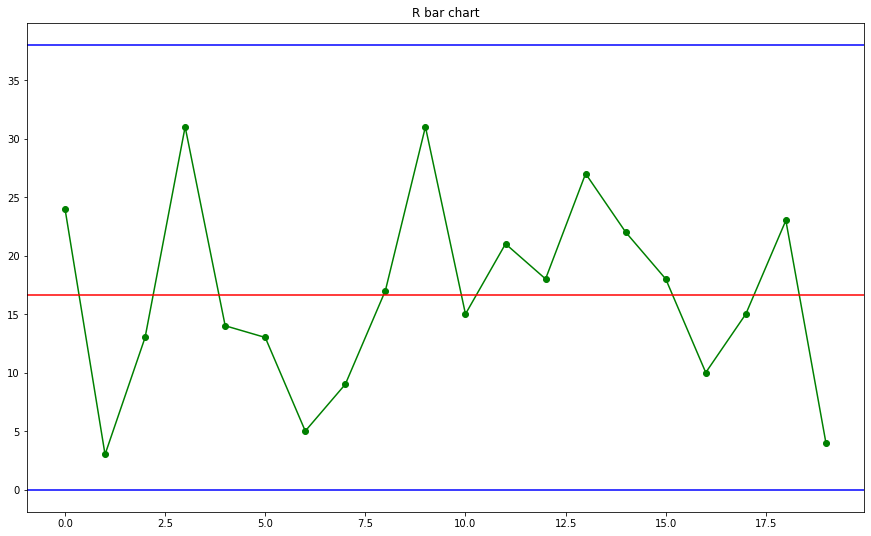

In [78]:
plt.figure(figsize=(15,9))
plt.title('R bar chart')
plt.plot(range(len(layer.range_r)), layer.range_r ,'go-')
plt.axhline(y=UCLr, color='b', linestyle='-')
plt.axhline(y=LCLr, color='b', linestyle='-')
plt.axhline(y=r_bar, color='r', linestyle='-') 

X-bar chart

In [74]:
x_bar_bar = layer.x_bar.mean()
a2 = 0.729 
UCLx = x_bar_bar + a2 * r_bar
LCLx = x_bar_bar - a2 * r_bar

In [75]:
UCLx

460.82535

In [76]:
LCLx

436.54965

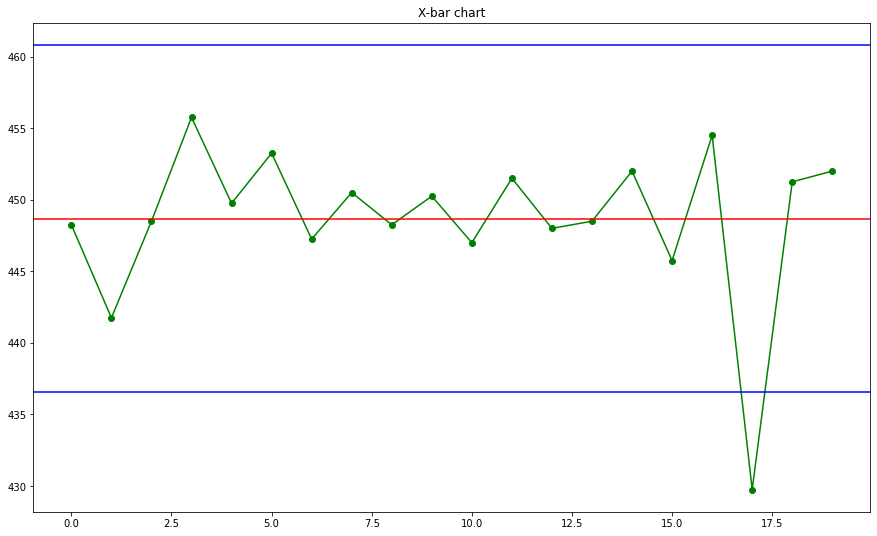

In [77]:
plt.figure(figsize=(15,9))
plt.title('X-bar chart')
plt.plot(range(len(layer.x_bar)), layer.x_bar ,'go-' )
plt.axhline(y=UCLx, color='b', linestyle='-')
plt.axhline(y=LCLx, color='b', linestyle='-')
plt.axhline(y=x_bar_bar, color='r', linestyle='-')


* It is out of control so we need to do two phase

In [58]:
### find the point that is out of control and drop it
out=layer[layer['x_bar'] < LCLx]
out


,x1,x2,x3,x4,x_bar,range_r
17,422,431,437,429,429.75,15.0


In [80]:
layer.drop(index=17,inplace=True)

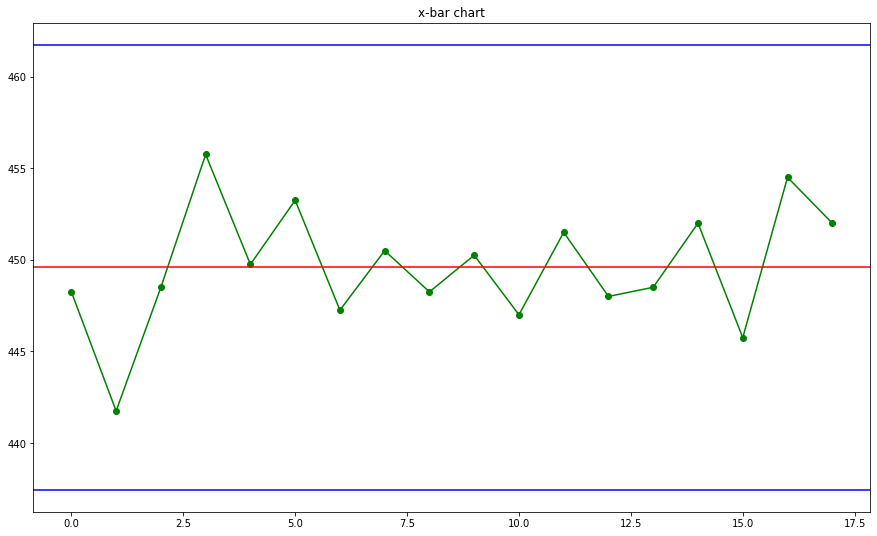

In [81]:
### New column of the x_bar 
layer['x_bar']=pd.DataFrame([layer.iloc[i,0:4].mean() for i in range(0,19)])
### x_bar chart upper control limit and lower controll limit
x_bar_bar=layer.x_bar.mean()
UCLx=x_bar_bar + a2 * r_bar
LCLx=x_bar_bar - a2 * r_bar

### ploting the result
plt.figure(figsize=(15,9))
plt.title('x-bar chart')
plt.plot(range(len(layer.x_bar)),layer.x_bar,'go-')
plt.axhline(y=UCLx, color='b', linestyle='-')
plt.axhline(y=LCLx, color='b', linestyle='-')
plt.axhline(y=x_bar_bar, color='r', linestyle='-')

### Estimate the mean and standard deviation

In [42]:
import math

In [85]:
mean_est=x_bar_bar
row=layer.index.size
calc_std=lambda col,mean: sum([(col[i]-mean)**2 for i in col.index])
std_estimated=lambda*a: math.sqrt(sum(a)/len(a)*row)

sum_x1=calc_std(layer['x1'],mean_est)
sum_x2=calc_std(layer['x2'],mean_est)
sum_x3=calc_std(layer['x3'],mean_est)
sum_x4=calc_std(layer['x4'],mean_est)

std_estimated = std_estimated(sum_x1,sum_x2,sum_x3,sum_x4)
print("The estimated mean is",mean_est)
print("The estimated standard deviation is", std_estimated)

The estimated mean is 449.59722222222223
The estimated standard deviation is 153.07426849207124


* 2_fill heights 


In [87]:
### 2

fill_heights=pd.read_csv("C:\\Users\\Lenovo\\OneDrive\\Desktop\\fill_heights.csv")
fill_heights 

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,2.5,0.5,2.0,-1.0,1.0,-1.0,0.5,1.5,0.5,-1.5
1,0.0,0.0,0.5,1.0,1.5,1.0,-1.0,1.0,1.5,-1.0
2,1.5,1.0,1.0,-1.0,0.0,-1.5,-1.0,-1.0,1.0,-1.0
3,0.0,0.5,-2.0,0.0,-1.0,1.5,-1.5,0.0,-2.0,-1.5
4,0.0,0.0,0.0,-0.5,0.5,1.0,-0.5,-0.5,0.0,0.0
5,1.0,-0.5,0.0,0.0,0.0,0.5,-1.0,1.0,-2.0,1.0
6,1.0,-1.0,-1.0,-1.0,0.0,1.5,0.0,1.0,0.0,0.0
7,0.0,-1.5,-0.5,1.5,0.0,0.0,0.0,-1.0,0.5,-0.5
8,-2.0,-1.5,1.5,1.5,0.0,0.0,0.5,1.0,0.0,1.0
9,-0.5,3.5,0.0,-1.0,-1.5,-1.5,-1.0,-1.0,1.0,0.5


In [88]:
fill_heights.mean()

x1     0.266667
x2     0.066667
x3     0.066667
x4    -0.033333
x5     0.066667
x6     0.033333
x7    -0.266667
x8     0.066667
x9     0.100000
x10   -0.400000
dtype: float64

In [89]:
fill_heights.std()

x1     1.066815
x2     1.387015
x3     1.083425
x4     0.972234
x5     1.066815
x6     1.216944
x7     0.883715
x8     0.961150
x9     1.312032
x10    1.003565
dtype: float64

In [90]:
fill_heights ['x_bar'] = pd.DataFrame([fill_heights .iloc[i, 0:10].mean() for i in range(0,15)])
fill_heights ['x_bar']

0     0.50
1     0.45
2    -0.10
3    -0.60
4     0.00
5     0.00
6     0.05
7    -0.15
8     0.20
9    -0.15
10    0.30
11    0.00
12   -0.55
13   -0.15
14    0.15
Name: x_bar, dtype: float64

In [91]:
fill_heights ['range_r'] = pd.DataFrame([(fill_heights .iloc[i, 0:10].max()- fill_heights .iloc[i, 0:10].min()) for i in range(0,15)])
fill_heights ['range_r']

0     4.0
1     2.5
2     3.0
3     3.5
4     1.5
5     3.0
6     2.5
7     3.0
8     3.5
9     5.0
10    3.5
11    4.0
12    2.0
13    3.5
14    3.5
Name: range_r, dtype: float64

In [92]:
fill_heights.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x_bar,range_r
0,2.5,0.5,2.0,-1.0,1.0,-1.0,0.5,1.5,0.5,-1.5,0.50,4.0
1,0.0,0.0,0.5,1.0,1.5,1.0,-1.0,1.0,1.5,-1.0,0.45,2.5
2,1.5,1.0,1.0,-1.0,0.0,-1.5,-1.0,-1.0,1.0,-1.0,-0.10,3.0
3,0.0,0.5,-2.0,0.0,-1.0,1.5,-1.5,0.0,-2.0,-1.5,-0.60,3.5
4,0.0,0.0,0.0,-0.5,0.5,1.0,-0.5,-0.5,0.0,0.0,0.00,1.5


* R-bar

In [93]:
r_bar = fill_heights.range_r.mean()
r_bar

3.2

In [94]:
d3=0.223
d4 = 1.777
UCLr = d4 * r_bar
LCLr = d3 * r_bar

In [95]:
UCLr

5.6864

In [96]:
LCLr

0.7136

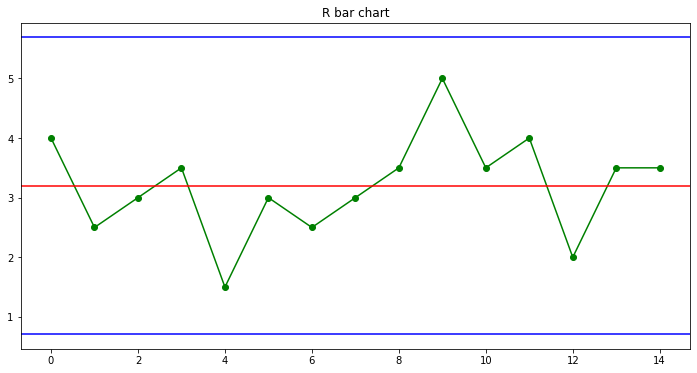

In [97]:
plt.figure(figsize=(12,6))
plt.title('R bar chart')
plt.plot(range(len(fill_heights.range_r)), fill_heights.range_r ,'go-')
plt.axhline(y=UCLr, color='b', linestyle='-')
plt.axhline(y=LCLr, color='b', linestyle='-')
plt.axhline(y=r_bar, color='r', linestyle='-') 

X-bar chart

In [98]:
x_bar_bar = fill_heights.x_bar.mean()
a2 = 0.308 
UCLx = x_bar_bar + a2 * r_bar
LCLx = x_bar_bar - a2 * r_bar

In [99]:
UCLr

5.6864

In [100]:
LCLr

0.7136

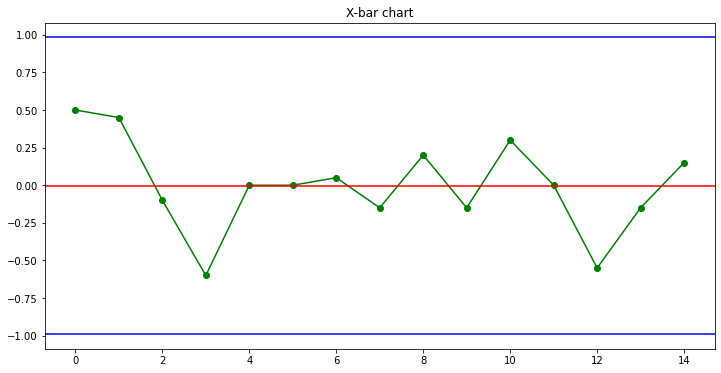

In [101]:
plt.figure(figsize=(12,6))
plt.title('X-bar chart')
plt.plot(range(len(fill_heights.x_bar)), fill_heights.x_bar ,'go-' )
plt.axhline(y=UCLx, color='b', linestyle='-')
plt.axhline(y=LCLx, color='b', linestyle='-')
plt.axhline(y=x_bar_bar, color='r', linestyle='-')

In [102]:
mean_est=x_bar_bar
row=layer.index.size
calc_std=lambda col,mean: sum([(col[i]-mean)**2 for i in col.index])
std_estimated=lambda*a: math.sqrt(sum(a)/len(a)*row)

sum_x1=calc_std(fill_heights ['x1'],mean_est)
sum_x2=calc_std(fill_heights ['x2'],mean_est)
sum_x3=calc_std(fill_heights ['x3'],mean_est)
sum_x4=calc_std(fill_heights ['x4'],mean_est)
sum_x5=calc_std(fill_heights ['x5'],mean_est)
sum_x6=calc_std(fill_heights ['x6'],mean_est)
sum_x7=calc_std(fill_heights ['x7'],mean_est)
sum_x8=calc_std(fill_heights ['x8'],mean_est)
sum_x9=calc_std(fill_heights ['x9'],mean_est)
sum_x10=calc_std(fill_heights['x10'],mean_est)

std_estimated = std_estimated(sum_x1,sum_x2,sum_x3,sum_x4,sum_x5,sum_x6,sum_x7,sum_x8,sum_x9,sum_x10)
print("The estimated mean is",mean_est)
print("The estimated standard deviation is", std_estimated)

The estimated mean is -0.003333333333333336
The estimated standard deviation is 18.29950363625564
